# Figure 3 panels

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import re
from pathlib import Path
import utils.fig_utils as fig_utils

In [2]:
import importlib
%load_ext autoreload
%autoreload 2

In [3]:
from utils.fig3_utils import *

In [4]:
# Set the directory for where to save figures, create the directory if it doesn't exist
fig_outdir = 'figures'
data_dir = '../data/'
Path(fig_outdir).mkdir(parents=True, exist_ok=True)

# Data

In [5]:
# Download data.
fig_utils.download_data(data_dir + 'round2_codons_merged.csv', fig_utils.urls['round2_codons_merged.csv'])
fig_utils.download_data(data_dir + 'round2_codons_separate.csv', fig_utils.urls['round2_codons_separate.csv'])

Already have ../data/round2_codons_merged.csv skipping download.
Already have ../data/round2_codons_separate.csv skipping download.


## Round 2 library, pulldown and in vivo assays, codon replicates aggregated

In [6]:
r2_df = pd.read_csv(data_dir + 'round2_codons_merged.csv')
r2_df

/Users/barrya/.virtualenvs/pulldown/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,AA_sequence,SOURCE,reference,reference_sequence,invivo_source,5,6,7,DNA_1_RPM,DNA_2_RPM,...,F1-BalbC-B_log2enr,F2-BalbC-B_log2enr,M1-BalbC-B_log2enr,M2-BalbC-B_log2enr,F1-C57-B_log2enr,M1-C57-B_log2enr,M2-C57-B_log2enr,BALB/c_log2enr,C57BL/6_log2enr,log2fitness
0,*AGSMMV,STOP,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,12.860694,11.726311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.459701
1,*AKQGAQ,STOP,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,11.145935,11.275300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.780696
2,*AWYIIG,STOP,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,11.788970,10.598782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.779192
3,*CGCWAS,STOP,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,11.360280,11.275300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.243019
4,*CNQNIP,STOP,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,5.787312,8.118216,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24974,YYLPEGG,LY6C1,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,12.324832,11.049794,...,NaN,NaN,NaN,NaN,NaN,-3.038558,NaN,NaN,-4.623521,-0.238538
24975,YYLPNGD,LY6C1,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,8.680969,7.441698,...,NaN,NaN,NaN,NaN,NaN,2.221164,NaN,NaN,0.636201,-1.391864
24976,YYPGYWE,LY6C1,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,11.788970,7.554451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.444388
24977,YYRGDSS,LY6C1,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,9.431176,11.275300,...,NaN,NaN,NaN,NaN,-0.419874,NaN,NaN,NaN,-2.004836,-0.054229


## Round 2 library, pulldown and in vivo assays, codon replicates separate

In [7]:
r2_df_sep = pd.read_csv(data_dir + 'round2_codons_separate.csv')
r2_df_sep

/Users/barrya/.virtualenvs/pulldown/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,AA_sequence,1,reference,reference_sequence,4,5,6,7,8,9,...,F1-BalbC-B_log2enr,F2-BalbC-B_log2enr,M1-BalbC-B_log2enr,M2-BalbC-B_log2enr,F1-C57-B_log2enr,M1-C57-B_log2enr,M2-C57-B_log2enr,152,153,154
0,SLVGNRW,NaN,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SLVGNRW,NaN,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RAVGNSW,NaN,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RAVGNSW,NaN,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-3.928529,1.243165,NaN,NaN,NaN,NaN
4,LATSRWD,NaN,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50135,RGNRGTEWDAQ,NaN,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50136,QRGNRGTEWDAQ,NaN,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50137,QRGNRGTEWDAQ,NaN,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50138,SAQAQAQ,NaN,AAV9_WT_SAQAQAQ,AAV9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.324596,-3.071646,2.218545,NaN,NaN,NaN


# Fig 3A,B - Round 2 library UMAPs projected onto Round 1 UMAPs + high brain transduction UMAP

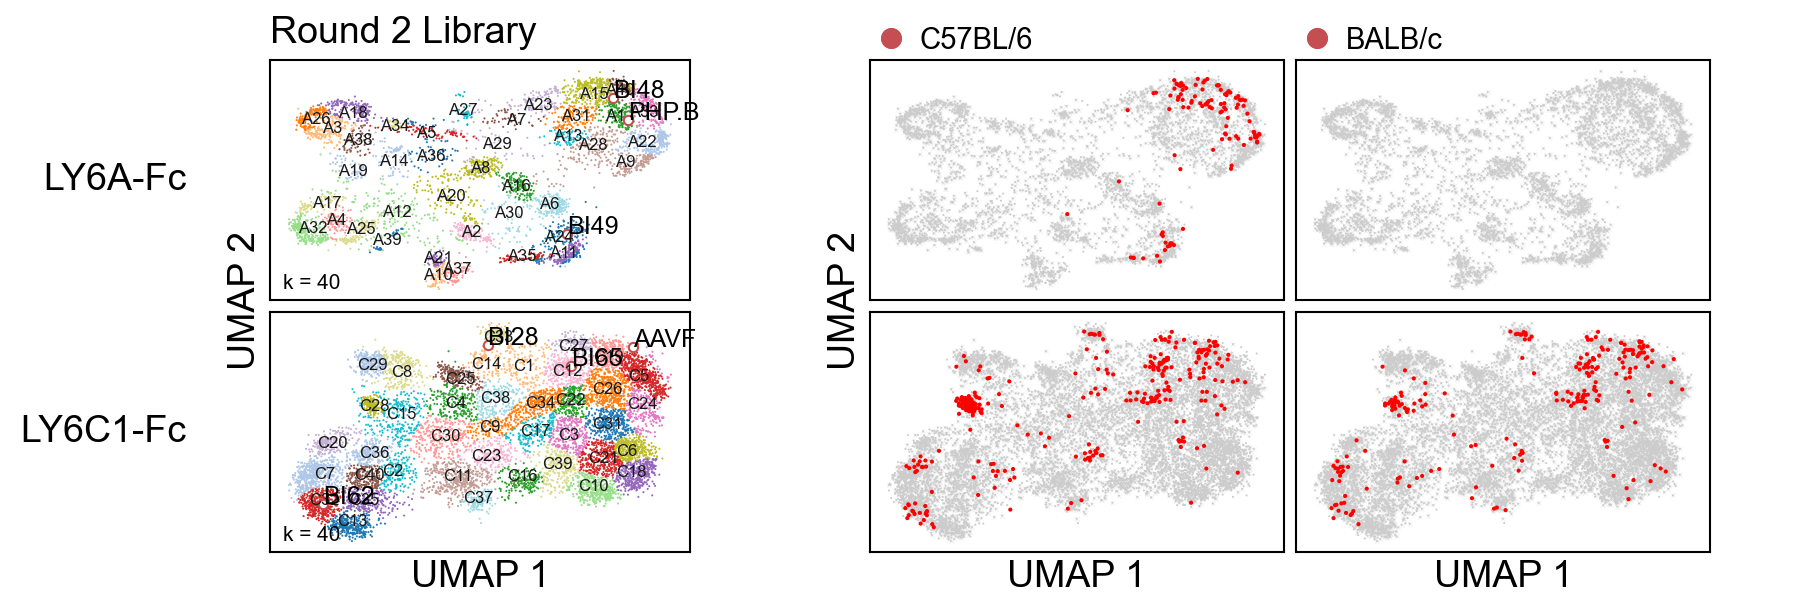

In [8]:
figname = 'fig3AB'
png_path, umap_coord_df_6a, umap_coord_df_6c, ref_dff_6a, ref_dff_6c = plot_r2_UMAP(r2_df, fig_outdir=fig_outdir, figname=figname)
Image(png_path)

# Fig 3C - Heatmap, in vivo screen, reference and selected variants

/Users/barrya/AAV_capsid_repo_folder/AAV_capsid_receptor/figures/utils/fig3_utils.py:536: UserWarning: Use the colorbar set_ticks() method instead.
  ax.set_xticks([-2, -1, 0, 1, 2])
/Users/barrya/AAV_capsid_repo_folder/AAV_capsid_receptor/figures/utils/fig3_utils.py:542: UserWarning: Use the colorbar set_ticks() method instead.
  ax.set_xticks([-10, -5, 0, 5, 10])


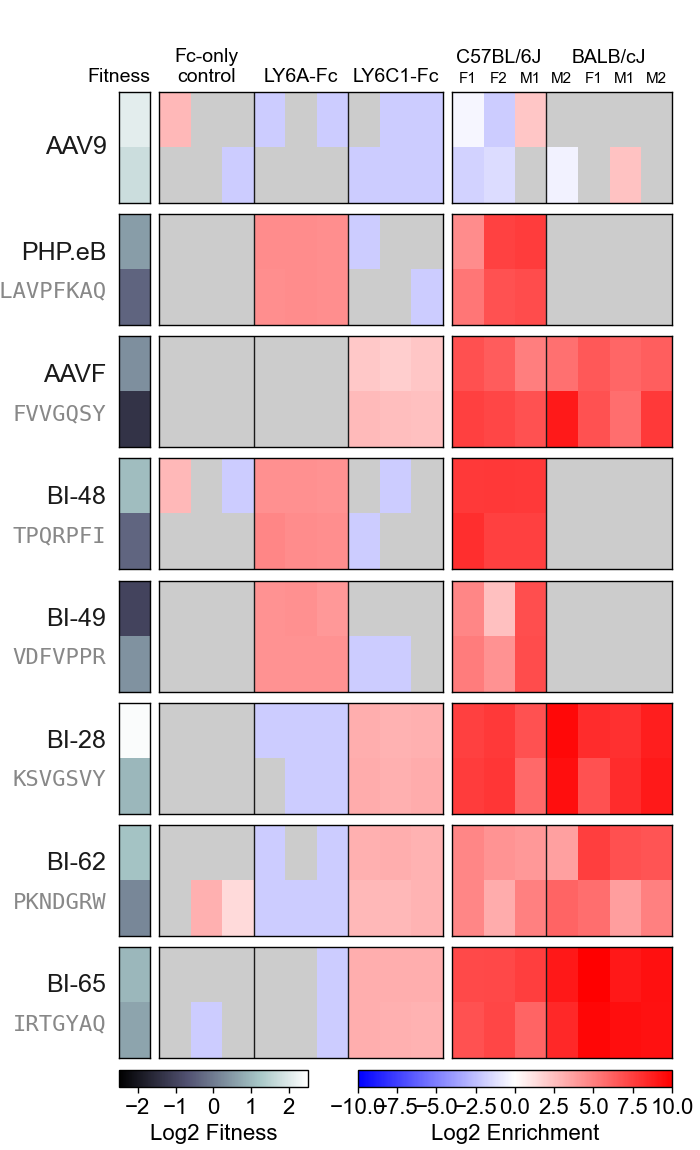

In [9]:
figname = 'fig3C'
png_path = plot_reference_heatmap(r2_df_sep, fig_outdir=fig_outdir, figname=figname)
Image(png_path)